In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

In [ ]:
fname='/data/esplab/shared/classes/metr3334/class_data/uwnd.2022.nc'

In [ ]:
ds=xr.open_dataset(fname)
ds['u']

In [ ]:
ds_850=ds.sel(level=850)
ds_850

In [ ]:
ds_mean=ds_850.mean(dim='time',keep_attrs=True)
plt.contourf(ds_mean['longitude'],ds_mean['latitude'],ds_mean['u'])
plt.colorbar()

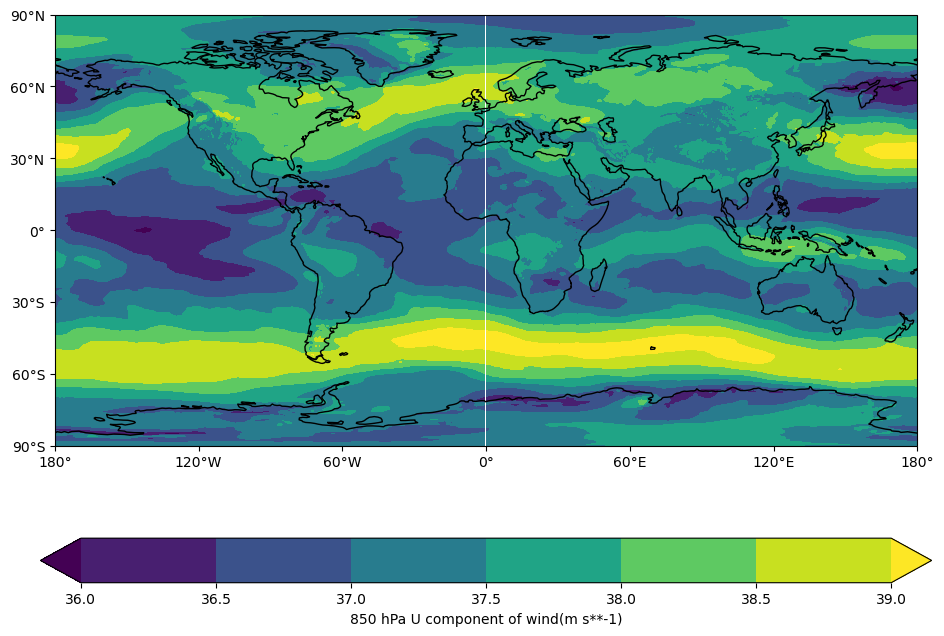

In [35]:
fig=plt.figure(figsize=(11.5,8))
ax=plt.axes(projection=ccrs.PlateCarree())
cs=ax.contourf(ds_mean['longitude'], 
              ds['latitude'], 
              ds_mean['u'],
              transform = ccrs.PlateCarree(),extend='both')

ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
units=ds_mean['u'].attrs['units']
varname=ds_mean['u'].attrs['long_name']
level=str(ds_mean['level'].values)
cbar = plt.colorbar(cs,orientation='horizontal',label=level+' hPa '+varname+'('+units+')')